# Demands and Trip Duration of Bike Sharing

## Investigation Overview

In this investigation, I wanted to find what features affect the demands of bikes and trip duration. The main focus was on the day of the week, month, time, and user type.


## Dataset Overview

The data is from three bike-sharing systems in San Francisco, Los Angeles, and Washington DC. The datasets consisted of approximately 6 million trip information in the year 2019 with 8 features. The features include trip duration, trip date and time, and user types. It also contains station information. About 90,000 trip information was removed from the analysis due to missing information.

The proportion of the trip information of San Francisco is approximately 39.5% or 2.4M and Los Angeles is only 4.8% or 290K. The largest portion is Washington DC which is about 55.7% or 3.4M trips. If the investigation is done for the whole data, it might mislead the results. Thus, Analysis by the individual city is mandatory.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bike_share = pd.read_csv('./data/bike_share_archive_master.csv')

/Users/jsshin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# change data type of start time and end time to datetime 
bike_share['start_time'] = pd.to_datetime(bike_share['start_time'])
bike_share['end_time'] = pd.to_datetime(bike_share['end_time'])

# start_time
bike_share['start_month'] = bike_share['start_time'].dt.month
bike_share['start_date'] = bike_share['start_time'].dt.day
bike_share['start_hour'] = bike_share['start_time'].dt.hour
bike_share['start_minute'] = bike_share['start_time'].dt.minute
bike_share['start_day'] = bike_share['start_time'].dt.day_name()

# end_time
bike_share['end_month'] = bike_share['end_time'].dt.month
bike_share['end_date'] = bike_share['end_time'].dt.day
bike_share['end_hour'] = bike_share['end_time'].dt.hour
bike_share['end_minute'] = bike_share['end_time'].dt.minute
bike_share['end_day'] = bike_share['end_time'].dt.day_name()

# change type of start_day and end_day to category
bike_share['start_day'] = bike_share['start_day'].astype("category")
bike_share['end_day'] = bike_share['end_day'].astype("category")
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
bike_share['start_day'] = pd.Categorical(bike_share['start_day'], categories=day_of_week, ordered=True)

# working day or not
work_day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday']
bike_share['working_day'] = bike_share['start_day'].isin(work_day_of_week)
bike_share['working_day'] = bike_share['working_day'].astype("category")

In [4]:
# Categorize user type
subscriber = ['Subscriber', 'Monthly Pass', 'Annual Pass', 'Flex Pass', 'Member']
bike_share['user_category'] = bike_share['user_type'].apply(lambda x: 'Subscriber' if x in(subscriber) else 'Casual')
bike_share['user_category'] = bike_share['user_category'].astype("category")

In [5]:
month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekends = ['Saturday', 'Sunday']

## Bike Demands by the Day of the Week

Generally, the average demands of bikes are higher on a weekday. The three cities have a little bit different pattern of demands by the day of the week. Interestingly, bike demands on Saturday in Washington DC are similar to weekdays.

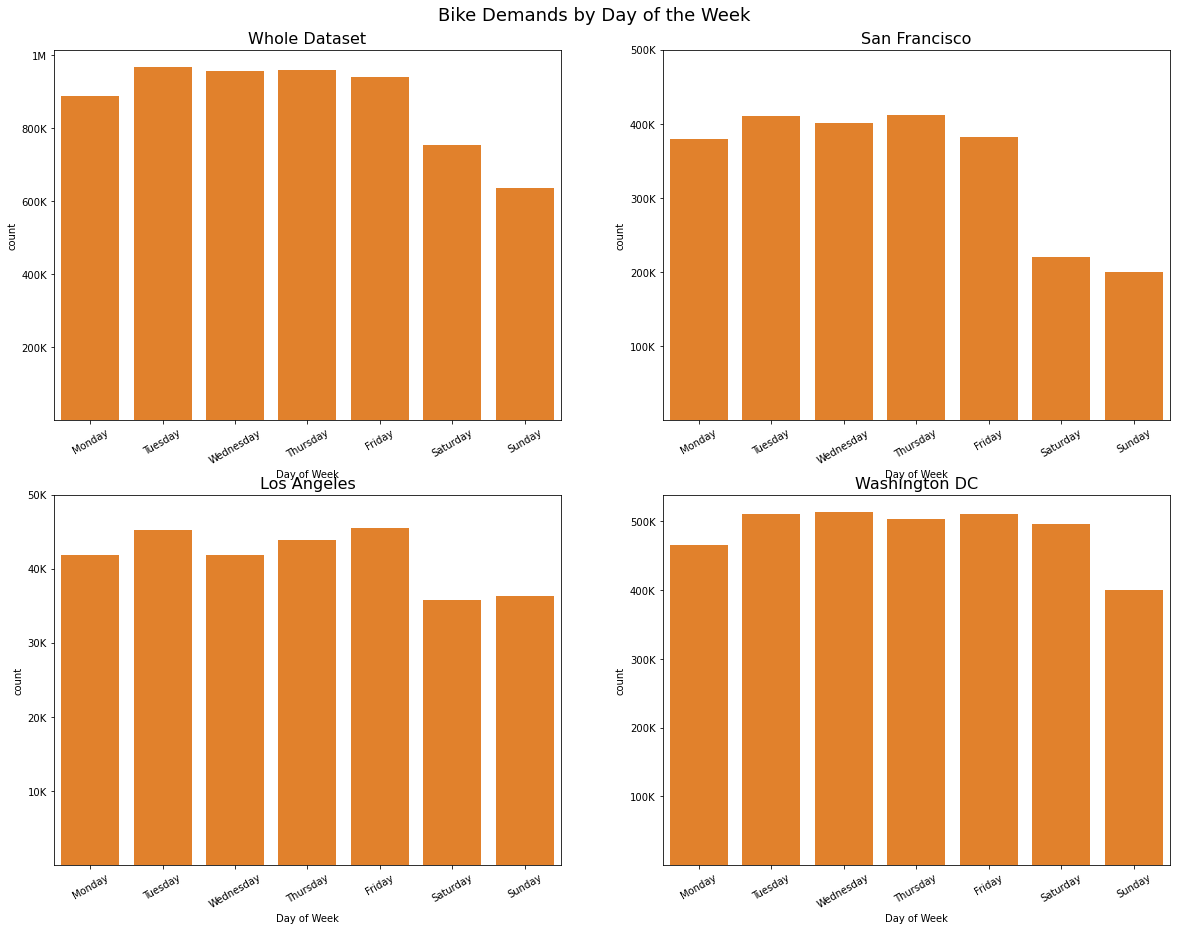

In [6]:
weekday_sum = bike_share.start_day.isin(weekday).sum()
weekends_sum = bike_share.start_day.isin(weekends).sum()

# Plot the demands of bike by day of the week
base_color = sb.color_palette()[1]

# Average demands on weekday and weekend
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekends = ['Saturday', 'Sunday']

plt.figure(figsize=[20, 15])
plt.suptitle('Bike Demands by Day of the Week', fontsize = 18, y = 0.92)

# Bike demands by day of the week.
plt.subplot(2, 2, 1)
g = sb.countplot(data = bike_share, x = 'start_day', color = base_color)
# plt.yscale('log')
y_ticks = [2e5, 4e5, 6e5, 8e5, 10e5]
y_ticks_label = ['200K', '400K','600K','800K', '1M']
plt.yticks(y_ticks, y_ticks_label)
plt.xticks(rotation = '30')
plt.xlabel('Day of Week')
plt.title('Whole Dataset', fontsize = 16);

# compute average demands on weekday and weekend
avg_demand_weekday = bike_share.start_day.isin(weekday).sum()/5
avg_demand_weekends = bike_share.start_day.isin(weekends).sum()/2

# Bike demands by day of the week: San Francisco
plt.subplot(2, 2, 2)
demands = bike_share[bike_share['city'] == 'San Francisco']
g = sb.countplot(data = demands, x = 'start_day', color = base_color)
# plt.yscale('log')
y_ticks = [1e5, 2e5, 3e5, 4e5, 5e5]
y_ticks_label = ['100K', '200K','300K','400K', '500K']
plt.yticks(y_ticks, y_ticks_label)
plt.xticks(rotation = '30')
plt.xlabel('Day of Week')
plt.title('San Francisco', fontsize = 16);

# compute average demands on weekday and weekend
avg_demand_weekday_sf = demands.start_day.isin(weekday).sum()/5
avg_demand_weekends_sf = demands.start_day.isin(weekends).sum()/2

# Bike demands by day of the week: Los Angeles
plt.subplot(2, 2, 3)
demands = bike_share[bike_share['city'] == 'Los Angeles']
g = sb.countplot(data = demands, x = 'start_day', color = base_color)
# plt.yscale('log')
y_ticks = [1e4, 2e4, 3e4, 4e4, 5e4]
y_ticks_label = ['10K', '20K','30K','40K', '50K']
plt.yticks(y_ticks, y_ticks_label)
plt.xticks(rotation = '30')
plt.xlabel('Day of Week')
plt.title('Los Angeles', fontsize = 16);

# compute average demands on weekday and weekend
avg_demand_weekday_la = demands.start_day.isin(weekday).sum()/5
avg_demand_weekends_la = demands.start_day.isin(weekends).sum()/2

# Bike demands by day of the week: Los Angeles
plt.subplot(2, 2, 4)
demands = bike_share[bike_share['city'] == 'Washington DC']
g = sb.countplot(data = demands, x = 'start_day', color = base_color)
# plt.yscale('log')
y_ticks = [1e5, 2e5, 3e5, 4e5, 5e5]
y_ticks_label = ['100K', '200K','300K','400K', '500K']
plt.yticks(y_ticks, y_ticks_label)
plt.xticks(rotation = '30')
plt.xlabel('Day of Week')
plt.title('Washington DC', fontsize = 16);

# compute average demands on weekday and weekend
avg_demand_weekday_dc = demands.start_day.isin(weekday).sum()/5
avg_demand_weekends_dc = demands.start_day.isin(weekends).sum()/2

In [7]:
# average demands on weekday and weekends
print('Average Demands (weekday) \t(weekends) \t(ratio)')
print('Whole Dataset:\t',avg_demand_weekday,'\t', avg_demand_weekends,'\t',
      '{:.2f}'.format(avg_demand_weekday/avg_demand_weekends))
print('San Francisco:\t', avg_demand_weekday_sf, '\t', avg_demand_weekends_sf,'\t',
      '{:.2f}'.format(avg_demand_weekday_sf/avg_demand_weekends_sf))
print('Los Angeles:\t', avg_demand_weekday_la, '\t', avg_demand_weekends_la,'\t',
      '{:.2f}'.format(avg_demand_weekday_la/avg_demand_weekends_la))
print('Washington DC:\t', avg_demand_weekday_dc,'\t', avg_demand_weekends_dc,'\t',
      '{:.2f}'.format(avg_demand_weekday_dc/avg_demand_weekends_dc))

Average Demands (weekday) 	(weekends) 	(ratio)
Whole Dataset:	 941309.2 	 694672.5 	 1.36
San Francisco:	 397196.4 	 210638.5 	 1.89
Los Angeles:	 43633.6 	 36030.5 	 1.21
Washington DC:	 500479.2 	 448003.5 	 1.12


## Bike Demands by Month

The bike demands of the three cities are different. In San Francisco, Mar, Apr, Aug, Sep, and Oct are higher than in other months. In Los Angeles, Jul to Oct are higher demands than other months. In contrast, the bike demands in Washington DC increase as getting warmer and decrease getting cold.

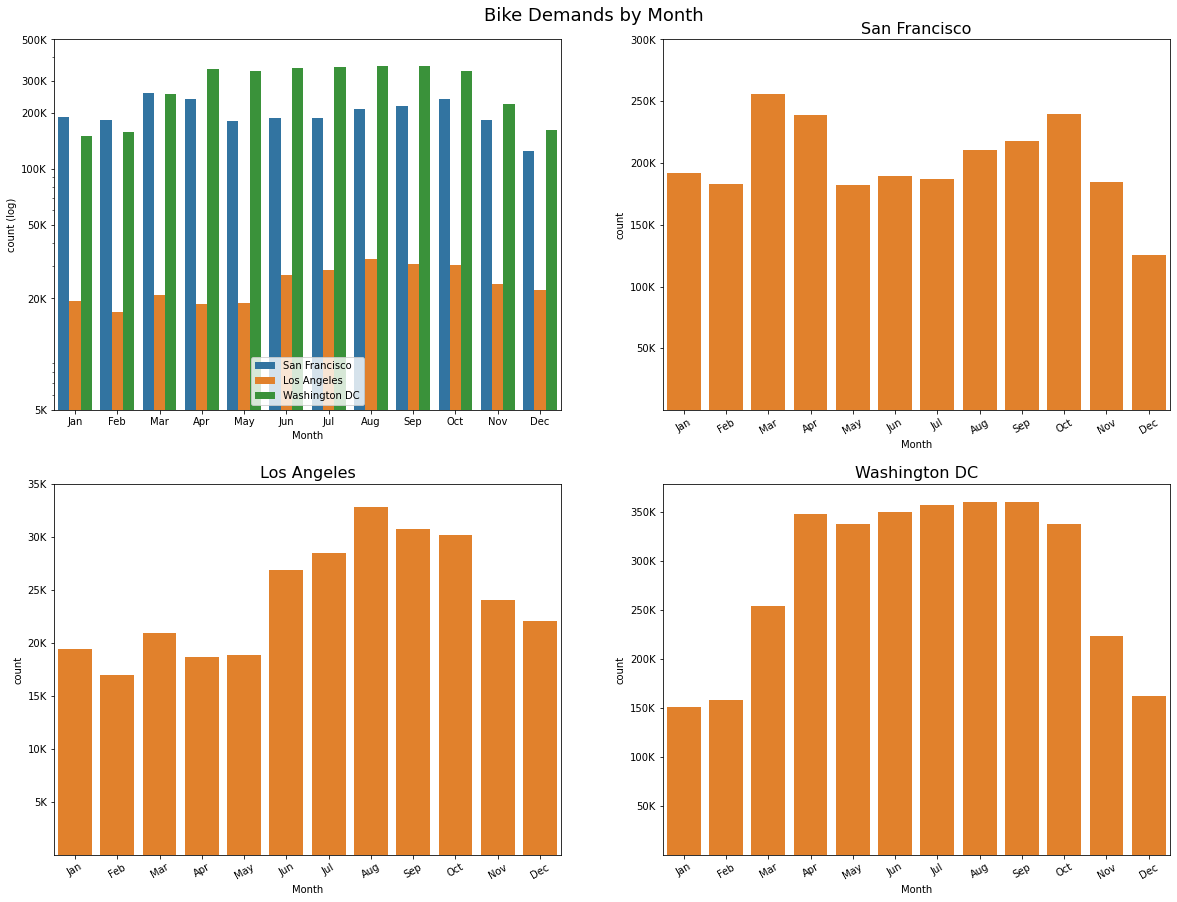

In [8]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=[20, 15])
plt.suptitle('Bike Demands by Month', fontsize = 18, y = 0.91)

# Bike demands by Month
plt.subplot(2, 2, 1)
g = sb.countplot(data = bike_share, x = 'start_month', hue = 'city')
g.set(xticklabels = months)
plt.yscale('log')
y_ticks = [0.5e4, 2e4, 5e4, 1e5, 2e5, 3e5, 5e5]
y_ticks_label = ['5K','20K','50K','100K','200K','300K','500K']
plt.yticks(y_ticks, y_ticks_label)
# plt.legend(bbox_to_anchor=(1.0, 1), loc='lower center')
plt.legend(loc='lower center')
plt.ylabel('count (log)')
plt.xlabel('Month');

# Bike demands by Month: San Francisco
plt.subplot(2, 2, 2)
demands = bike_share[bike_share['city'] == 'San Francisco']
g = sb.countplot(data = demands, x = 'start_month', color = base_color)
g.set(xticklabels = months)
# plt.yscale('log')
y_ticks = [0.5e5, 1e5, 1.5e5, 2e5, 2.5e5, 3e5]
y_ticks_label = ['50K', '100K', '150K', '200K','250K','300K']
plt.yticks(y_ticks, y_ticks_label)
plt.xticks(rotation = '30')
plt.xlabel('Month')
plt.title('San Francisco', fontsize = 16);

# Bike demands by Month: Los Angeles
plt.subplot(2, 2, 3)
demands = bike_share[bike_share['city'] == 'Los Angeles']
g = sb.countplot(data = demands, x = 'start_month', color = base_color)
g.set(xticklabels = months)
# plt.yscale('log')
y_ticks = [0.5e4, 1e4, 1.5e4, 2e4, 2.5e4, 3e4, 3.5e4]
y_ticks_label = ['5K','10K','15K','20K','25K','30K','35K']
plt.yticks(y_ticks, y_ticks_label)
plt.xticks(rotation = '30')
plt.xlabel('Month')
plt.title('Los Angeles', fontsize = 16);
                     
# Bike demands by Month: Washington DC
plt.subplot(2, 2, 4)
demands = bike_share[bike_share['city'] == 'Washington DC']
g = sb.countplot(data = demands, x = 'start_month', color = base_color)
g.set(xticklabels = months)
# plt.yscale('log')
y_ticks = [0.5e5, 1e5, 1.5e5, 2e5, 2.5e5, 3e5, 3.5e5]
y_ticks_label = ['50K', '100K', '150K', '200K','250K','300K','350K']
plt.yticks(y_ticks, y_ticks_label)
plt.xticks(rotation = '30')
plt.xlabel('Month')
plt.title('Washington DC', fontsize = 16);

## Bike Demands by Time

The pattern of bike demands by time is quite different between weekdays and weekends. On weekdays, more demands on rush hours between 7 to 10 in the morning time and 16 to 19 in the afternoon. Unlike weekdays, the demands for bikes peaked in the daytime between 12 to 16 in the afternoon on weekends.

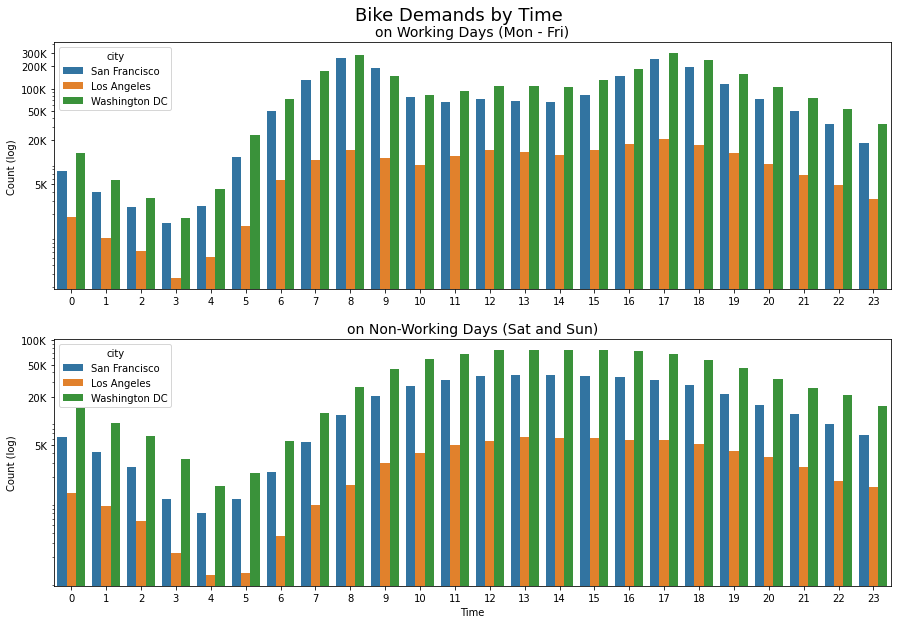

In [9]:
bike_share_working_day = bike_share[bike_share.working_day == True]
bike_share_non_working_day = bike_share[bike_share.working_day == False]

plt.figure(figsize=[15, 10])
plt.suptitle('Bike Demands by Time', fontsize = 18, y = 0.93)

# Bike demands by Time
# plt.subplot(3, 1, 1)
# g = sb.countplot(data = bike_share, x = 'start_hour', hue = 'working_day')
# plt.legend(title='Type of Day', loc='upper left', labels=['Non-Working Day', 'Working Day'])
# plt.xlabel('')
# plt.title('Whole Dataset', fontsize = 14);

# Bike demands by Time on Weekdays or Working Days
plt.subplot(2, 1, 1)
g = sb.countplot(data = bike_share_working_day, x = 'start_hour', hue = 'city')
plt.yscale('log')
y_ticks = [0.5e4, 2e4, 5e4, 1e5, 2e5, 3e5]
y_ticks_label = ['5K','20K','50K','100K','200K','300K']
plt.yticks(y_ticks, y_ticks_label)
plt.xlabel('')
plt.ylabel('Count (log)')
plt.title('on Working Days (Mon - Fri)', fontsize = 14);

# Bike demands by Time on Weekends or Non-Working Days
plt.subplot(2, 1, 2)
g = sb.countplot(data = bike_share_non_working_day, x = 'start_hour', hue = 'city')
plt.yscale('log')
y_ticks = [0.5e4, 2e4, 5e4, 1e5]
y_ticks_label = ['5K','20K','50K','100K']
plt.yticks(y_ticks, y_ticks_label)
plt.xlabel('Time')
plt.ylabel('Count (log)')
plt.title('on Non-Working Days (Sat and Sun)', fontsize = 14);

## Bike Demands by Month, Day of the Week and City

The darker colors indicate more rides. The heatmaps show more rides on weekdays in many months. In San Francisco, the bike demands on weekdays are higher than on weekends regardless of the month. However, in Los Angeles, the demands on weekends are similar to or higher than weekdays in Mar, Jun, Aug, and Sep. In Washington DC, the demands on weekends are similar to or higher than weekdays in Mar, Apr, Jun, Jul, Aug, and Sep.

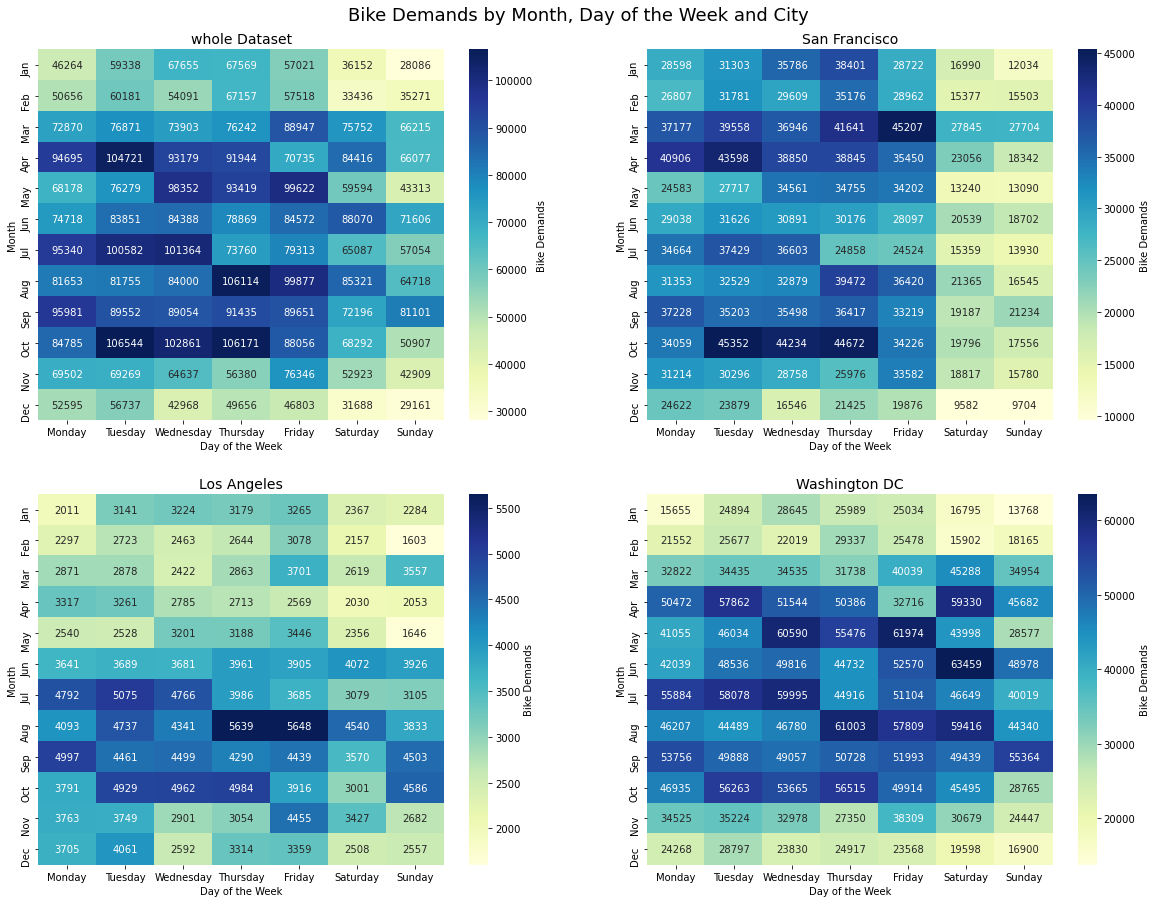

In [10]:
# Demands

plt.figure(figsize=[20, 15])
plt.suptitle('Bike Demands by Month, Day of the Week and City', fontsize = 18, y = 0.92)

# Average Bike Demands: Total
plt.subplot(2, 2, 1)

demands = bike_share.groupby(['start_month','start_day']).count()["bike_id"]
demands = demands.reset_index()
demands = demands.pivot(index = 'start_month', columns = 'start_day', values = 'bike_id')

g = sb.heatmap(demands, annot=True, fmt = 'd', cbar_kws={'label':'Bike Demands'}, cmap = "YlGnBu")
g.set(xticklabels = day_of_week)
g.set(yticklabels = months)

plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title("whole Dataset", fontsize = 14);

# Average Trip Duraion for San Francisco
plt.subplot(2, 2, 2)

demands = bike_share.query('city == "San Francisco"').groupby(['start_month','start_day']).count()["bike_id"]
demands = demands.reset_index()
demands = demands.pivot(index = 'start_month', columns = 'start_day', values = 'bike_id')

g = sb.heatmap(demands, annot=True, fmt = 'd', cbar_kws={'label':'Bike Demands'}, cmap = "YlGnBu")
g.set(xticklabels = day_of_week)
g.set(yticklabels = months)

plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title("San Francisco", fontsize = 14);

# Average Trip Duraion for Los Angeles
plt.subplot(2, 2, 3)

demands = bike_share.query('city == "Los Angeles"').groupby(['start_month','start_day']).count()["bike_id"]
demands = demands.reset_index()
demands = demands.pivot(index = 'start_month', columns = 'start_day', values = 'bike_id')

g = sb.heatmap(demands, annot=True, fmt = 'd', cbar_kws={'label':'Bike Demands'}, cmap = "YlGnBu")
g.set(xticklabels = day_of_week)
g.set(yticklabels = months)

plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title("Los Angeles", fontsize = 14);

# Average Trip Duraion for Washington DC
plt.subplot(2, 2, 4)

demands = bike_share.query('city == "Washington DC"').groupby(['start_month','start_day']).count()["bike_id"]
demands = demands.reset_index()
demands = demands.pivot(index = 'start_month', columns = 'start_day', values = 'bike_id')

g = sb.heatmap(demands, annot=True, fmt = 'd', cbar_kws={'label':'Bike Demands'}, cmap = "YlGnBu")
g.set(xticklabels = day_of_week)
g.set(yticklabels = months)

plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title("Washington DC", fontsize = 14);

## Trip Duration

Bbikes are used for travel of short distances. 75% of total trips are less than or equal to 17 minutes and more than 90% of trips are less than 30 minutes. Average duration is 15 minutes on weekdays and 22 minutes on weekends and trip durations on weekends are about 5 minutes longer than weekdays.

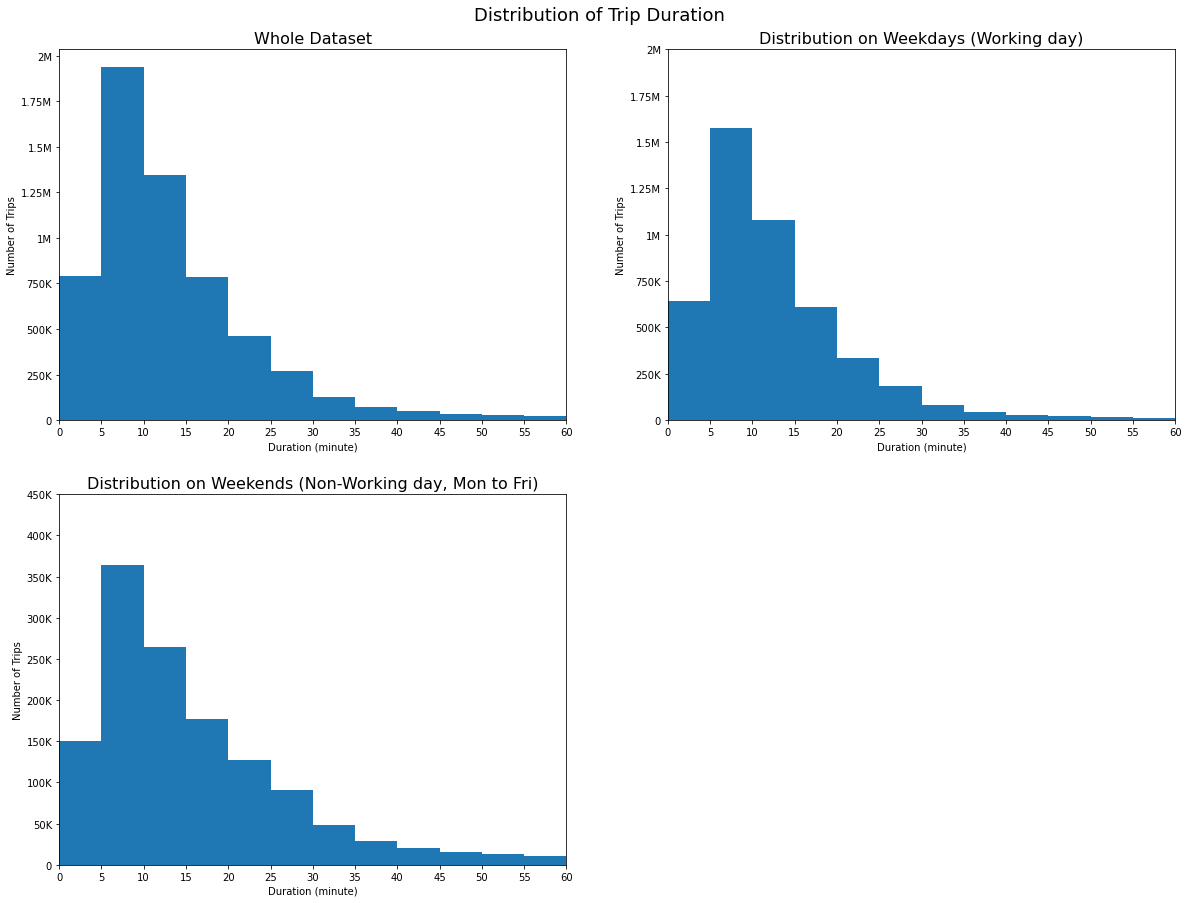

In [11]:
bin_size = 5
bins = np.arange(0, bike_share['duration'].max()+bin_size, bin_size)

plt.figure(figsize=[20,15])
plt.suptitle('Distribution of Trip Duration', fontsize = 18, y = 0.92)

plt.subplot(2, 2, 1)
plt.hist(data = bike_share, x = 'duration', bins = bins)

# limit the duration of trip to less than or equal to 60 minutes
plt.xlim(0, 60)
plt.title('Whole Dataset', fontsize = 16)
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Duration (minute)')
y_ticks = [0, 2.5e5, 5e5, 7.5e5, 10e5, 12.5e5, 15e5, 17.5e5, 20e5]
y_ticks_label = ['0', '250K', '500K', '750K', '1M', '1.25M', '1.5M', '1.75M', '2M']
plt.yticks(y_ticks, y_ticks_label)
plt.ylabel('Number of Trips');

plt.subplot(2, 2, 2)
plt.hist(data = bike_share_working_day, x = 'duration', bins = bins)

# limit the duration of trip to less than or equal to 60 minutes
plt.xlim(0, 60)
plt.title('Distribution on Weekdays (Working day)', fontsize = 16)
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Duration (minute)')
y_ticks = [0, 2.5e5, 5e5, 7.5e5, 10e5, 12.5e5, 15e5, 17.5e5, 20e5]
y_ticks_label = ['0', '250K', '500K', '750K', '1M', '1.25M', '1.5M', '1.75M', '2M']
plt.yticks(y_ticks, y_ticks_label)
plt.ylabel('Number of Trips');

plt.subplot(2, 2, 3)
plt.hist(data = bike_share_non_working_day, x = 'duration', bins = bins)

# limit the duration of trip to less than or equal to 60 minutes
plt.xlim(0, 60)
plt.title('Distribution on Weekends (Non-Working day, Mon to Fri)', fontsize = 16)
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Duration (minute)')
y_ticks = [0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4, 45e4]
y_ticks_label = ['0', '50K', '100K', '150K', '200K', '250K', '300K', '350K', '400K', '450K']
plt.yticks(y_ticks, y_ticks_label)
plt.ylabel('Number of Trips');

## Average Trip Duration of Three Cities

Overall, the average trip duration on weekends is longer than weekdays. During the cold-weather season, the average trip durations are a little bit lower than other seasons.
In San Francisco, the average trip durations on weekdays are between 11 and 14 minutes regardless of months and the average trip durations on weekends are about 5 to 6 minutes longer than weekdays. In the cold-weather season of Dec, Jan, and Feb, the average trip durations on weekends are about 14 to 16 minutes, which are lower than other months.
In Los Angeles, the average trip durations are longer than San Francisco and their values are mostly between 24 and 36. On weekends, the average trip durations are over 40 minutes from Jan to Aug.
In Washington DC, the average trip durations on weekdays are slightly wide range than in San Francisco. The average trip duration is between 12 and 19 minutes. On weekends, average trip durations are longer than weekdays like the other two cities.

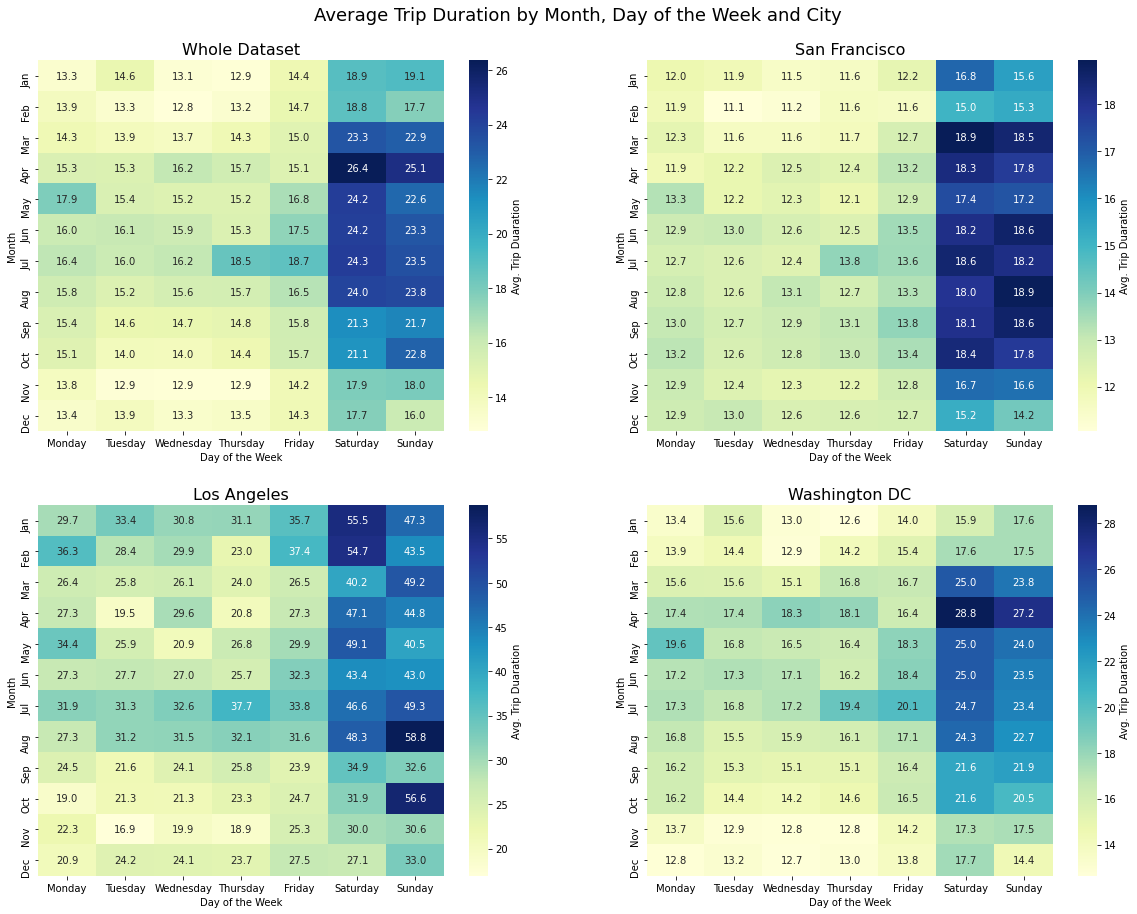

In [12]:
# Average Trip Duration
# plt.plot([2, 2, 2])
plt.figure(figsize=[20, 15])
plt.suptitle('Average Trip Duration by Month, Day of the Week and City', fontsize = 18, y =0.93)

# Average Trip Duration: Total
plt.subplot(2, 2, 1)

duration_means = bike_share.groupby(['start_month','start_day']).mean()["duration"]
duration_means = duration_means.reset_index()
duration_means = duration_means.pivot(index = 'start_month', columns = 'start_day', values = 'duration')

g = sb.heatmap(duration_means, annot=True, fmt = '.1f', cbar_kws={'label':'Avg. Trip Duaration'}, cmap = "YlGnBu")
g.set(xticklabels = day_of_week)
g.set(yticklabels = months)

plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title("Whole Dataset", fontsize = 16);

# Average Trip Duraion for San Francisco
plt.subplot(2, 2, 2)

duration_means = bike_share.query('city == "San Francisco"').groupby(['start_month','start_day']).mean()["duration"]
duration_means = duration_means.reset_index()
duration_means = duration_means.pivot(index = 'start_month', columns = 'start_day', values = 'duration')

g = sb.heatmap(duration_means, annot=True, fmt = '.1f', cbar_kws={'label':'Avg. Trip Duaration'}, cmap = "YlGnBu")
g.set(xticklabels = day_of_week)
g.set(yticklabels = months)

plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title("San Francisco", fontsize = 16);

# Average Trip Duraion for Los Angeles
plt.subplot(2, 2, 3)

duration_means = bike_share.query('city == "Los Angeles"').groupby(['start_month','start_day']).mean()["duration"]
duration_means = duration_means.reset_index()
duration_means = duration_means.pivot(index = 'start_month', columns = 'start_day', values = 'duration')

g = sb.heatmap(duration_means, annot=True, fmt = '.1f', cbar_kws={'label':'Avg. Trip Duaration'}, cmap = "YlGnBu")
g.set(xticklabels = day_of_week)
g.set(yticklabels = months)

plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title("Los Angeles", fontsize = 16);

# Average Trip Duraion for Washington DC
plt.subplot(2, 2, 4)

duration_means = bike_share.query('city == "Washington DC"').groupby(['start_month','start_day']).mean()["duration"]
duration_means = duration_means.reset_index()
duration_means = duration_means.pivot(index = 'start_month', columns = 'start_day', values = 'duration')

g = sb.heatmap(duration_means, annot=True, fmt = '.1f', cbar_kws={'label':'Avg. Trip Duaration'}, cmap = "YlGnBu")
g.set(xticklabels = day_of_week)
g.set(yticklabels = months)

plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title("Washington DC", fontsize = 16);

## Bike Demands by the Day of the Week

The bike demands by user type are quite different between San Francisco and the other two cities. 
In San Francisco, the demands from subscribers drop on weekends however, the casual users' demands are steady regardless of the day of the week. In Los Angeles and Washington DC, casual users use bike sharing services more on weekends. During the weekdays demands from casual users are steady and increase on weekends.
I guess this is most likely due to subscribers using the service to commute to work, while casual users use the bikes on an occasional basis for something unusual in their schedule in Los Angeles and Washington DC. But further study to find the answer why the demands from casual users are steady and different pattern of use.

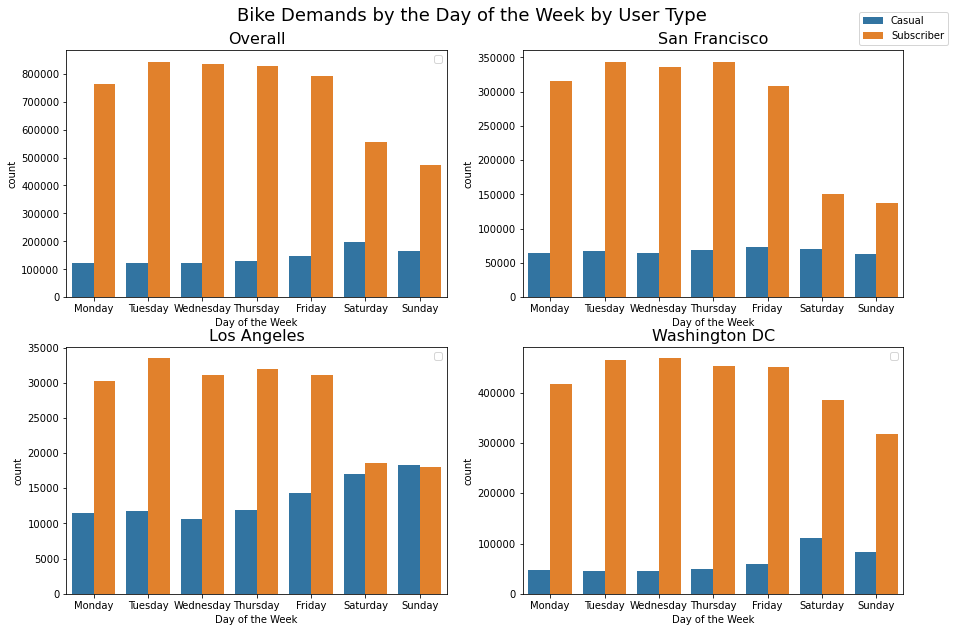

In [13]:
plt.figure(figsize=[15,10])
plt.suptitle('Bike Demands by the Day of the Week by User Type', fontsize = 18, y = 0.94)

plt.subplot(2, 2, 1)
g = sb.countplot(data = bike_share, x = 'start_day', hue = 'user_category')
plt.xlabel('Day of the Week')
plt.legend('')
plt.title('Overall', fontsize = 16);

# San Francisco
plt.subplot(2, 2, 2)
demands = bike_share[bike_share.city == "San Francisco"]
g = sb.countplot(data = demands, x = 'start_day', hue = 'user_category')
plt.xlabel('Day of the Week')
plt.legend(bbox_to_anchor=(1.0, 1), loc='lower center')
plt.title('San Francisco', fontsize = 16);

# Los Angeles
plt.subplot(2, 2, 3)
demands = bike_share[bike_share.city == "Los Angeles"]
g = sb.countplot(data = demands, x = 'start_day', hue = 'user_category')
plt.xlabel('Day of the Week')
plt.legend('')
plt.title('Los Angeles', fontsize = 16);

# Washington DC
plt.subplot(2, 2, 4)
demands = bike_share[bike_share.city == "Washington DC"]
g = sb.countplot(data = demands, x = 'start_day', hue = 'user_category')
plt.xlabel('Day of the Week')
plt.legend('')
plt.title('Washington DC', fontsize = 16);

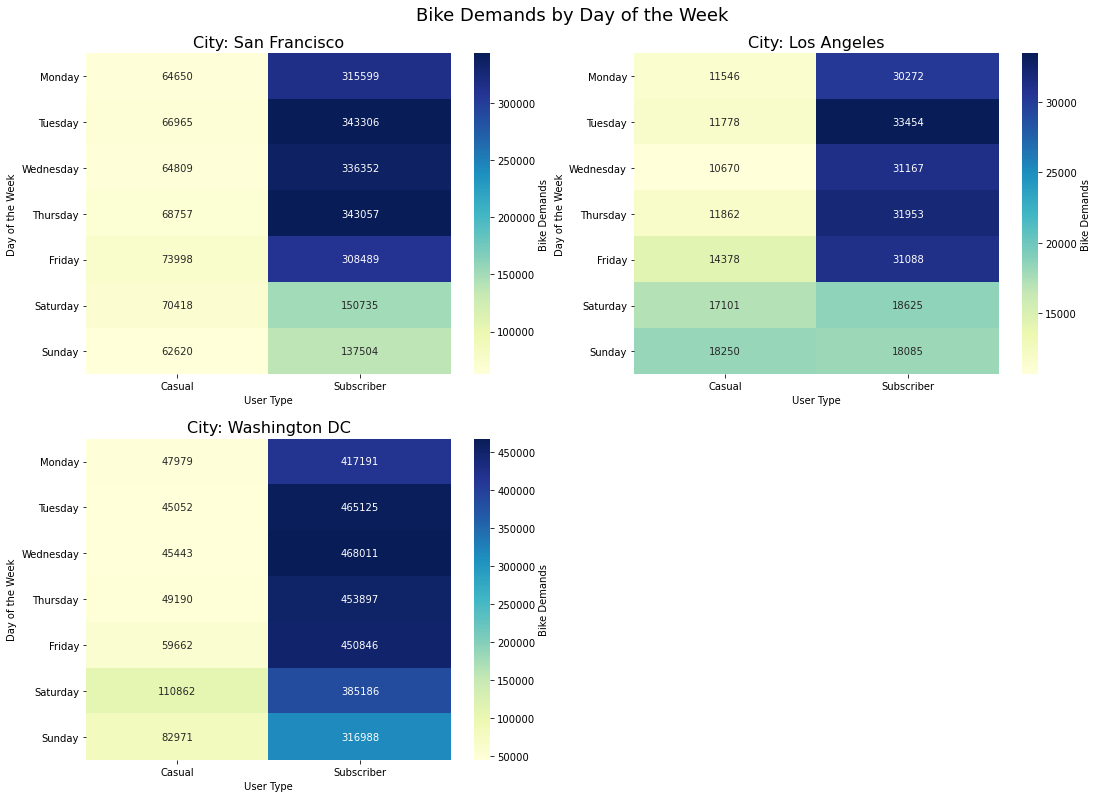

In [14]:
# Average Trip Duraion for San Francisco
plt.figure(figsize=[18,13])
plt.suptitle('Bike Demands by Day of the Week', fontsize = 18, y = 0.93)
plt.subplot(2, 2, 1)

demands = bike_share.query('city == "San Francisco"').groupby(['start_day','user_category']).count()["bike_id"]
demands = demands.reset_index()
demands = demands.pivot(index = 'start_day', columns = 'user_category', values = 'bike_id')

g = sb.heatmap(demands, annot=True, fmt = 'd', cbar_kws={'label':'Bike Demands'}, cmap = "YlGnBu")

plt.xlabel('User Type')
plt.ylabel('Day of the Week')
plt.title("City: San Francisco", fontsize = 16);

# Average Trip Duraion for Los Angeles
plt.subplot(2, 2, 2)

demands = bike_share.query('city == "Los Angeles"').groupby(['start_day','user_category']).count()["bike_id"]
demands = demands.reset_index()
demands = demands.pivot(index = 'start_day', columns = 'user_category', values = 'bike_id')

g = sb.heatmap(demands, annot=True, fmt = 'd', cbar_kws={'label':'Bike Demands'}, cmap = "YlGnBu")

plt.xlabel('User Type')
plt.ylabel('Day of the Week')
plt.title("City: Los Angeles", fontsize = 16);

# Average Trip Duraion for Washington DC
plt.subplot(2, 2, 3)

demands = bike_share.query('city == "Washington DC"').groupby(['start_day','user_category']).count()["bike_id"]
demands = demands.reset_index()
demands = demands.pivot(index = 'start_day', columns = 'user_category', values = 'bike_id')

g = sb.heatmap(demands, annot=True, fmt = 'd', cbar_kws={'label':'Bike Demands'}, cmap = "YlGnBu")

plt.xlabel('User Type')
plt.ylabel('Day of the Week')
plt.title("City: Washington DC", fontsize = 16);

## Require Further Study
Interestingly, the demands pattern are not the same in the three cities and followed the average temperature. I found the demands of the bike are different but I did not have the reasons why different. I thought the usage of bike-sharing services is almost similar regardless of location or cities, but the investigation results presented they were not. Further study might require weather data such as temperature, raining, or snowing and station location. I did not use coordinates for the analysis, but they might give me an answer for the trip duration.